In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# Target Variable is Rating
# When we looked in the data Current Ver, Android Ver does not affect the Rating
#And when we consider App there are as many as names -- they are important but for model buidling it would be too difficult as model cannot understand Categorical values but Category Defines it

In [9]:
#Dropping App, Current Ver,Android Ver
df.drop(columns=["App","Current Ver","Android Ver"],inplace= True)

In [11]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


#### Category and Generes

In [16]:
len(df.Category.value_counts())

34

In [18]:
len(df.Genres.value_counts())

120

In [20]:
df[['Category','Genres']].sample(15)

,Category,Genres
3530,PRODUCTIVITY,Productivity
3570,PRODUCTIVITY,Productivity
9050,COMMUNICATION,Communication
2475,MEDICAL,Medical
3207,TRAVEL_AND_LOCAL,Travel & Local
8692,PHOTOGRAPHY,Photography
2252,MEDICAL,Medical
156,BOOKS_AND_REFERENCE,Books & Reference
7032,FAMILY,Entertainment;Creativity
8472,GAME,Trivia


In [22]:
df.Rating.value_counts()

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [24]:
#When we co-relate Category and Generes it is having some realtion but when we compared with the len of both the columns
# when we use Generes as a Feature it may end up in overfitting because it might end up to learn each data point Separately 
# so we will keep complexity to a certain limit so we will drop Genres

In [26]:
df.drop(columns='Genres',inplace=True)

In [28]:
df.duplicated().sum()

492

In [30]:
df.drop_duplicates(inplace=True)

In [32]:
df.duplicated().sum()

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10349 non-null  object 
 1   Rating          8891 non-null   float64
 2   Reviews         10349 non-null  object 
 3   Size            10349 non-null  object 
 4   Installs        10349 non-null  object 
 5   Type            10348 non-null  object 
 6   Price           10349 non-null  object 
 7   Content Rating  10348 non-null  object 
 8   Last Updated    10349 non-null  object 
dtypes: float64(1), object(8)
memory usage: 808.5+ KB


### Type

In [37]:
df[df.Type.isna()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
9148,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,"June 28, 2018"


In [39]:
df.drop(df[df.Type.isna()].index,inplace=True)

In [41]:
df[df.Type.isna()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10348 non-null  object 
 1   Rating          8891 non-null   float64
 2   Reviews         10348 non-null  object 
 3   Size            10348 non-null  object 
 4   Installs        10348 non-null  object 
 5   Type            10348 non-null  object 
 6   Price           10348 non-null  object 
 7   Content Rating  10347 non-null  object 
 8   Last Updated    10348 non-null  object 
dtypes: float64(1), object(8)
memory usage: 808.4+ KB


### Content Rating

In [46]:
df[df['Content Rating'].isna()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19


In [48]:
toBeRemoved = df[df['Content Rating'].isna()].index

In [50]:
df.drop(toBeRemoved,inplace=True)

In [52]:
df[df['Content Rating'].isna()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10347 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10347 non-null  object 
 1   Rating          8890 non-null   float64
 2   Reviews         10347 non-null  object 
 3   Size            10347 non-null  object 
 4   Installs        10347 non-null  object 
 5   Type            10347 non-null  object 
 6   Price           10347 non-null  object 
 7   Content Rating  10347 non-null  object 
 8   Last Updated    10347 non-null  object 
dtypes: float64(1), object(8)
memory usage: 808.4+ KB


### Reviews

In [57]:
df.Reviews.sample(12)

3705            0
8267           20
5462          513
10582        1338
9090         3032
1147          685
4895        18604
403      10790289
6731            5
3084       838765
10630         499
7884            4
Name: Reviews, dtype: object

In [59]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [61]:
df.Reviews.describe()

count    1.034700e+04
mean     4.062934e+05
std      2.698052e+06
min      0.000000e+00
25%      3.300000e+01
50%      1.689000e+03
75%      4.657850e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [63]:
df['Reviews'].dtype

dtype('int64')

### Size

In [66]:
df.Size.sample(10)

9219                  3.8M
9790                  860k
5969                   31M
1661                   62M
871                   9.7M
8162                  4.8M
1237    Varies with device
1433                   10M
7625                   25M
3875                  2.9M
Name: Size, dtype: object

In [68]:
df.Size[df.Size == "Varies with device"] = np.nan

C:\Users\DELL\AppData\Local\Temp\ipykernel_25736\1354320329.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Size[df.Size == "Varies with device"] = np.nan
C:\Users\DELL\AppData\Local\Temp\ipykernel_25736\1354320329.py:1: SettingWithCo

In [70]:
df.Size.sample(10)

1888     NaN
7496    2.5M
6604    1.5M
9042     45M
1274     28M
5048    4.9M
6818     24M
7205    7.3M
2590     28M
945      20M
Name: Size, dtype: object

In [72]:
df.Size = df.Size.str.replace('M','e6')
df.Size = df.Size.str.replace('k','e3')

In [74]:
df.Size.sample(10)

8361    1.1e6
5787    3.0e6
448       NaN
3822      NaN
2035    8.9e6
535     7.9e6
9465      NaN
4635     11e6
906      16e6
4849     29e6
Name: Size, dtype: object

In [76]:
df.Size = pd.to_numeric(df['Size'], errors='coerce')

In [78]:
df.Size.sample(10)

2152      6900000.0
6899      1800000.0
7254      3000000.0
9267     14000000.0
8706      5700000.0
7996      9500000.0
10060    93000000.0
5323     16000000.0
7510      4600000.0
1696     63000000.0
Name: Size, dtype: float64

In [80]:
df.Size = df['Size'].fillna(df.Size.mean())

In [86]:
df['Size'].describe()

count    1.034700e+04
mean     2.128664e+07
std      2.082097e+07
min      8.500000e+03
25%      5.700000e+06
50%      1.700000e+07
75%      2.600000e+07
max      1.000000e+08
Name: Size, dtype: float64

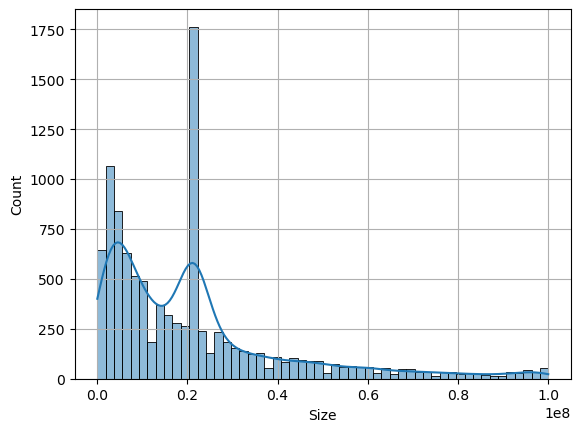

In [99]:
sns.histplot(data=df,x = 'Size',kde=True)
plt.grid()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10347 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10347 non-null  object 
 1   Rating          8890 non-null   float64
 2   Reviews         10347 non-null  int64  
 3   Size            10347 non-null  float64
 4   Installs        10347 non-null  object 
 5   Type            10347 non-null  object 
 6   Price           10347 non-null  object 
 7   Content Rating  10347 non-null  object 
 8   Last Updated    10347 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 808.4+ KB


### Installs

In [103]:
df.Installs.sample(10)

5748    100
2323    500
3096      5
2291      5
6975     10
335       1
4751    100
7924     50
6955      1
2553     10
Name: Installs, dtype: object

In [109]:
df.Installs.describe()

count    10347.000000
mean        72.936407
std        137.613565
min          0.000000
25%          5.000000
50%         10.000000
75%        100.000000
max        500.000000
Name: Installs, dtype: float64

In [101]:
df['Installs'] = df.Installs.str.extract('([0-9]+)',expand=True)

In [107]:
df['Installs'] = df['Installs'].apply(pd.to_numeric)

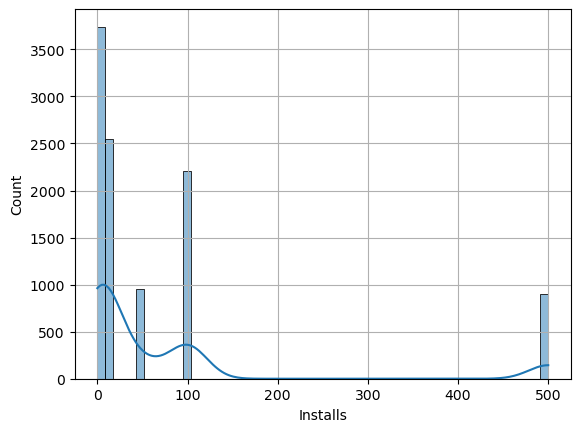

In [111]:
sns.histplot(data=df,x = 'Installs',kde=True)
plt.grid()

In [115]:
df.sample(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
1495,HOUSE_AND_HOME,4.0,515,5.800000e+06,50,Free,0,Everyone,"May 30, 2015"
6855,MEDICAL,NaN,0,8.700000e+06,500,Free,0,Everyone,"January 18, 2018"
1959,GAME,4.5,80678,2.128664e+07,5,Free,0,Mature 17+,"May 25, 2018"
7779,TOOLS,3.4,202,1.200000e+07,10,Free,0,Everyone,"June 16, 2017"
3746,NEWS_AND_MAGAZINES,4.0,13950,2.128664e+07,1,Free,0,Mature 17+,"August 6, 2018"
7266,HEALTH_AND_FITNESS,2.2,6,8.000000e+06,100,Free,0,Everyone,"January 5, 2018"
4065,FAMILY,4.4,187892,4.000000e+07,5,Free,0,Everyone,"May 10, 2018"
6537,LIBRARIES_AND_DEMO,4.1,174,8.160000e+05,10,Free,0,Everyone,"February 5, 2017"
5798,BUSINESS,NaN,0,9.000000e+06,10,Free,0,Everyone,"February 15, 2018"
10110,FAMILY,NaN,0,1.300000e+07,100,Free,0,Teen,"January 10, 2018"


In [117]:
df.Type.value_counts()

Type
Free    9582
Paid     765
Name: count, dtype: int64